# 4. Human myocardial infarction atlas
Kuppe, C., Ramirez Flores, R. O., Li, Z., Hayat, S., Levinson, R. T., Liao, X., ... & Kramann, R. (2022). Spatial multi-omic map of human myocardial infarction. Nature, 608(7924), 766-777.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scanpro functions
from scanpro import scanpro
from scanpro.utils import convert_counts_to_df

In [2]:
# path where figures are going to be saved
FIG_PATH = 'plots'

------------------

## Read data

In [3]:
human_MI_counts = pd.read_csv("data/human_MI_counts.tsv", sep="\t")
human_MI = convert_counts_to_df(human_MI_counts, meta_cols=['Sample', 'Sex', 'Age', 'Patient_group', 'Zone'],
                                column_name="cell_type")

In [4]:
human_MI.head()

,Sample,Sex,Age,Patient_group,Zone,cell_type
cell_1,CK158,Female,44,Myogenic,Control,Adipocyte
cell_2,CK158,Female,44,Myogenic,Control,Adipocyte
cell_3,CK159,Female,63,Myogenic,Fibrotic,Adipocyte
cell_4,CK159,Female,63,Myogenic,Fibrotic,Adipocyte
cell_5,CK159,Female,63,Myogenic,Fibrotic,Adipocyte


In [5]:
cluster_count = human_MI.value_counts('cell_type').sort_index().to_dict()
cluster_count

{'Adipocyte': 523,
 'Cardiomyocyte': 64510,
 'Cycling cells': 2980,
 'Endothelial': 32684,
 'Fibroblast': 47309,
 'Lymphoid': 5064,
 'Mast': 719,
 'Myeloid': 21082,
 'Neuronal': 2436,
 'Pericyte': 11752,
 'Vsmcs': 2736}

-------------

## Compare Ischaemic zone vs Control

### With replicates

In [6]:
# transform=logit
res_snrna = scanpro(human_MI, samples_col='Sample',
                    clusters_col='cell_type', conds_col='Zone', 
                    conditions=['Control','Ischaemic'])

res_snrna.results.to_csv("results/humanMI_scanpro_rep_logit.tsv", sep="\t")

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


In [7]:
# transform=arcsin
res_snrna = scanpro(human_MI, samples_col='Sample',
                    clusters_col='cell_type', conds_col='Zone', 
                    conditions=['Control','Ischaemic'], transform="arcsin")
res_snrna.results.to_csv("results/humanMI_scanpro_rep_arcsin.tsv", sep="\t")

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


In [8]:
res_snrna.results

,baseline_props,mean_props_Control,mean_props_Ischaemic,prop_ratio,t_statistics,p_values,adjusted_p_values
clusters,,,,,,,
Adipocyte,0.002727,0.000355,0.002084,0.170583,-0.880071,0.392633,0.474737
Cardiomyocyte,0.336349,0.442471,0.152491,2.901614,3.187247,0.006089,0.033489
Cycling cells,0.015537,0.005429,0.063373,0.085660,-4.283988,0.000645,0.007099
Endothelial,0.170411,0.146923,0.207000,0.709772,-1.436211,0.171366,0.269290
Fibroblast,0.246664,0.225862,0.271549,0.831755,-0.808137,0.431579,0.474737
Lymphoid,0.026403,0.012775,0.043002,0.297090,-2.079905,0.055004,0.151261
Mast,0.003749,0.003495,0.003041,1.149458,0.720604,0.482177,0.482177
Myeloid,0.109919,0.074778,0.185137,0.403904,-2.659489,0.017790,0.065232
Neuronal,0.012701,0.013734,0.007297,1.882211,1.834276,0.086423,0.190132


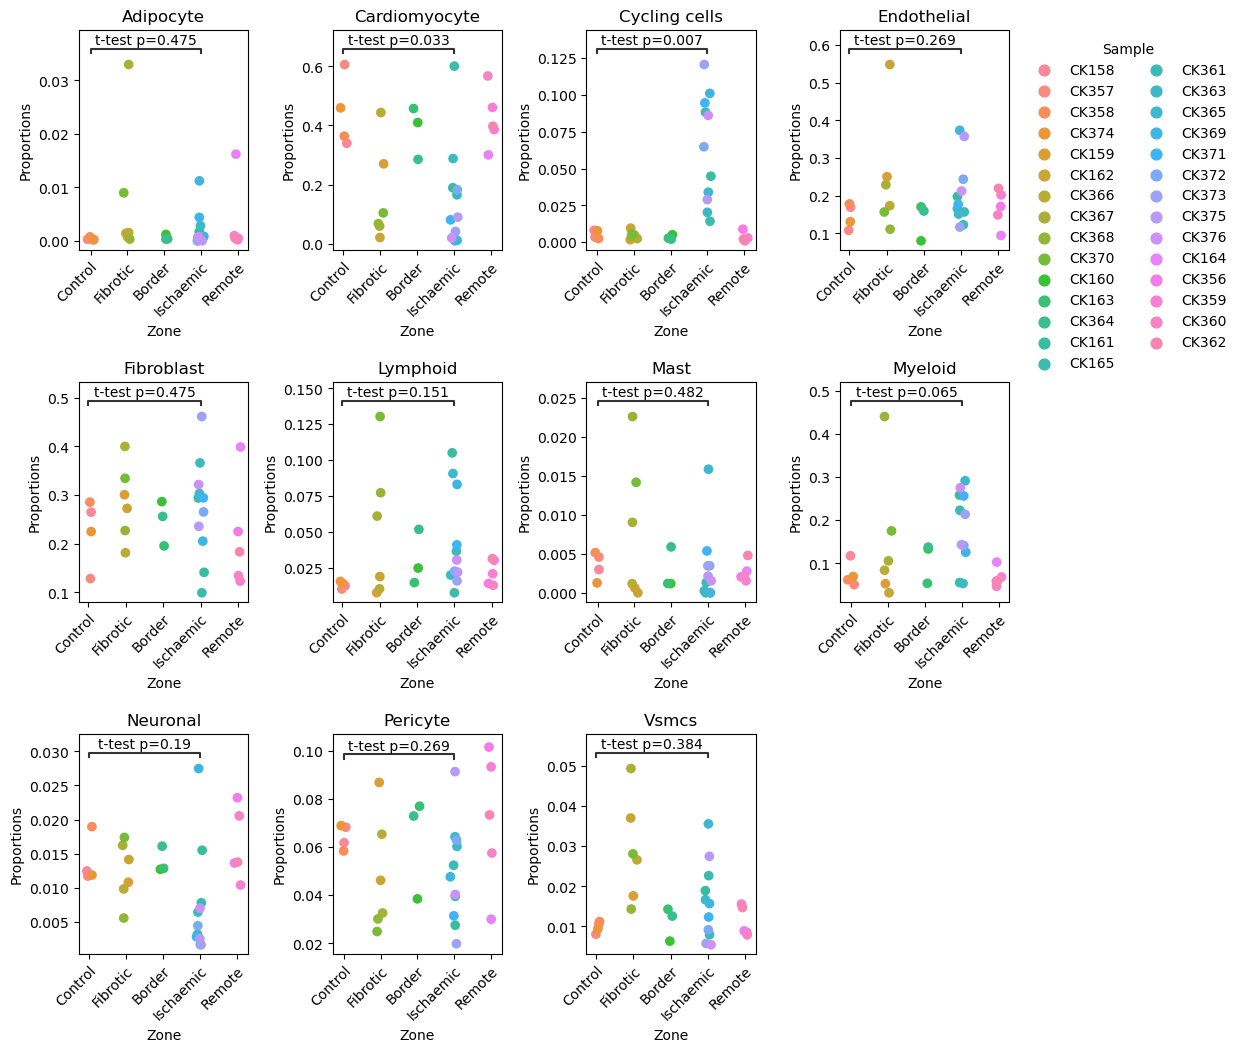

In [9]:
res_snrna.plot(n_columns=4, save=f"{FIG_PATH}/humanMI_rep_all.pdf")

### Without replicates

In [10]:
res_snrna_boot = scanpro(human_MI, clusters_col='cell_type',
                         conds_col='Zone', n_reps=8, conditions=['Control','Ischaemic'],
                         transform='logit')
res_snrna_boot.results.to_csv("results/humanMI_scanpro_norep_logit.tsv", sep="\t")

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 40.38 seconds


In [11]:
res_snrna_boot = scanpro(human_MI, clusters_col='cell_type',
                         conds_col='Zone', n_reps=8, conditions=['Control','Ischaemic'],
                         transform='arcsin')

res_snrna_boot.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 40.5 seconds


,baseline_props,mean_props_Control,mean_props_Ischaemic,p_values
clusters,,,,
Adipocyte,0.002727,0.000197,0.001382,0.330257
Cardiomyocyte,0.336349,0.435557,0.139486,0.000021
Cycling cells,0.015537,0.004474,0.066946,0.000153
Endothelial,0.170411,0.145418,0.188093,0.153107
Fibroblast,0.246664,0.223161,0.296439,0.062627
Lymphoid,0.026403,0.011700,0.034682,0.093176
Mast,0.003749,0.002692,0.002833,0.595996
Myeloid,0.109919,0.074340,0.188807,0.001499
Neuronal,0.012701,0.012110,0.004204,0.186249


In [12]:
res_snrna_boot.results.to_csv("results/humanMI_scanpro_norep_arcsin.tsv", sep="\t")

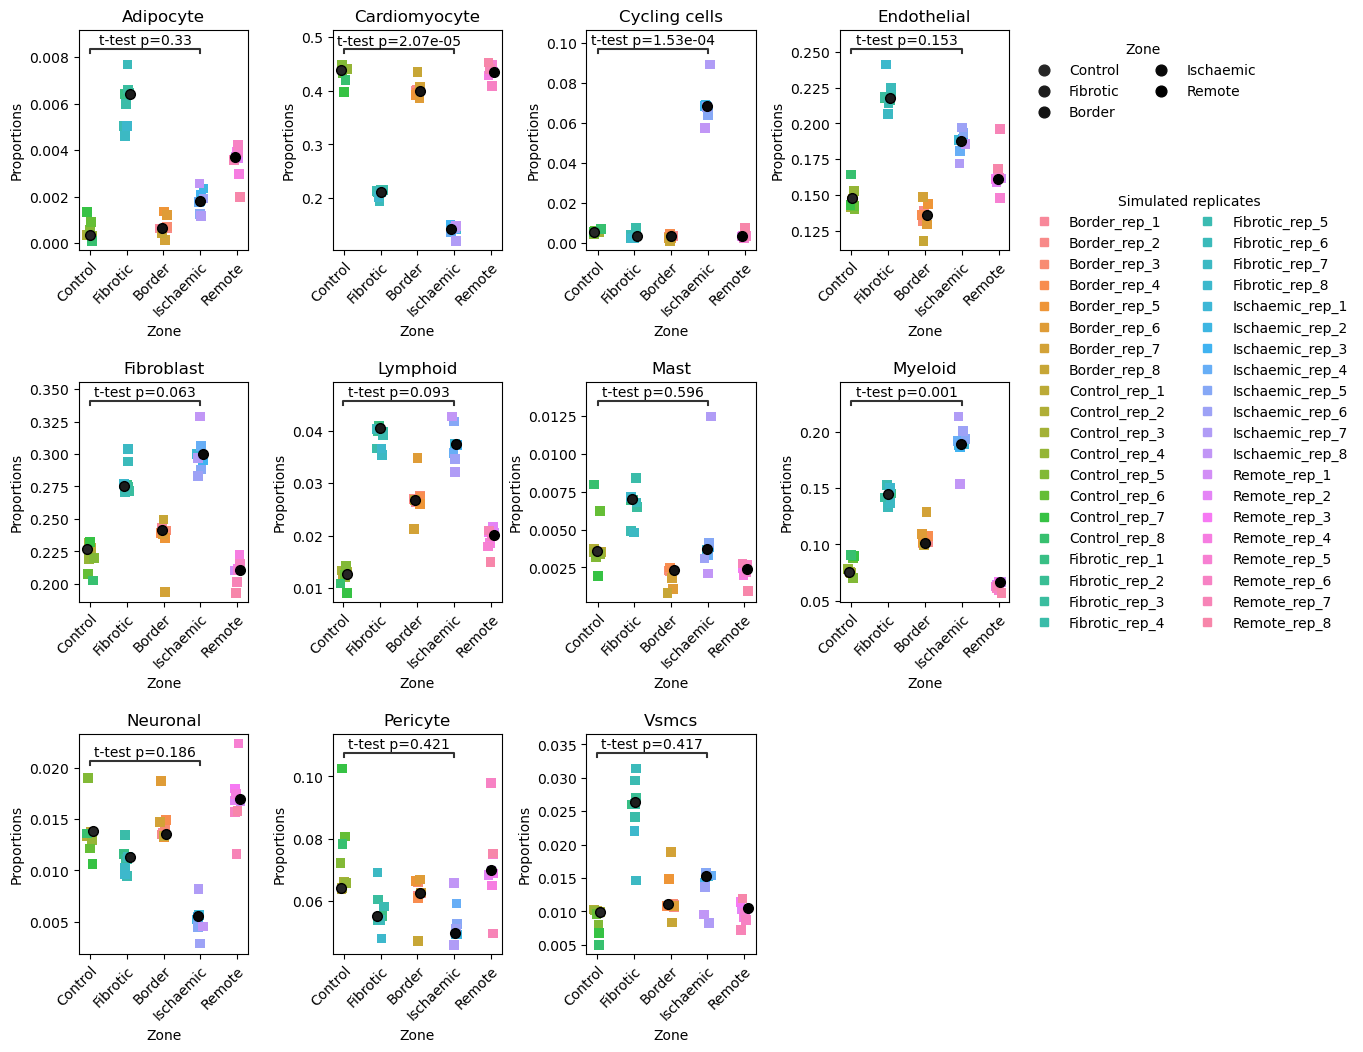

In [13]:
res_snrna_boot.plot(n_columns=4, save=f"{FIG_PATH}/humanMI_norep_all.pdf")

-------------------

## Compare results with/without replicates

In [14]:
# get results with and without replicates
compare = {'Replicated': -np.log10(res_snrna.results.iloc[:,-1].values),
           'Unreplicated': -np.log10(res_snrna_boot.results.iloc[:,-1].values)}

index = [f"{celltype} ({n_cells} cells)" for celltype, n_cells in cluster_count.items()]
compare = pd.DataFrame(compare, index=index)

compare

,Replicated,Unreplicated
Adipocyte (523 cells),0.323547,0.481148
Cardiomyocyte (64510 cells),1.475097,4.683396
Cycling cells (2980 cells),2.148783,3.815511
Endothelial (32684 cells),0.569780,0.815006
Fibroblast (47309 cells),0.323547,1.203241
Lymphoid (5064 cells),0.820274,1.030697
Mast (719 cells),0.316794,0.224757
Myeloid (21082 cells),1.185541,2.824203
Neuronal (2436 cells),0.720946,0.729906
Pericyte (11752 cells),0.569780,0.375326


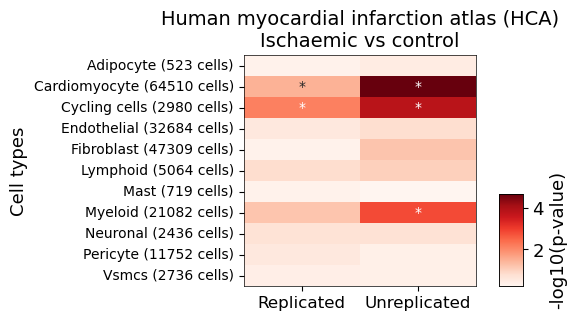

In [15]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# annotation for heatmap
annot = {'Replicated': ['*' if value < 0.05 else '' for value in res_snrna.results.iloc[:,-1].to_list()],
         'Unreplicated': ['*' if value < 0.05 else '' for value in res_snrna_boot.results.iloc[:,-1].to_list()]}

fig, ax = plt.subplots(1, 1, figsize=(3, 3))

cax = inset_axes(ax, width="10%", height="40%", loc='lower left',
                        bbox_to_anchor=(1.1, 0, 1, 1),
                        bbox_transform=ax.transAxes, borderpad=0)

sns.heatmap(compare, annot=pd.DataFrame(annot), fmt='', cmap='Reds',
            ax=ax, cbar_kws={'label': '-log10(p-value)'}, cbar_ax=cax)

ax.set_title("Human myocardial infarction atlas (HCA)\nIschaemic vs control", fontsize=14)
ax.set_ylabel('Cell types', fontsize=13)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=13)
ax.figure.axes[-1].yaxis.label.set_size(13)

# Drawing the frame
for ax_ in [ax, cax]:
    for _, spine in ax_.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.5)

plt.savefig(f'{FIG_PATH}/humanMI_ischaemic_vs_ctrl_heatmap.pdf', dpi=300, bbox_inches='tight')

plt.show()

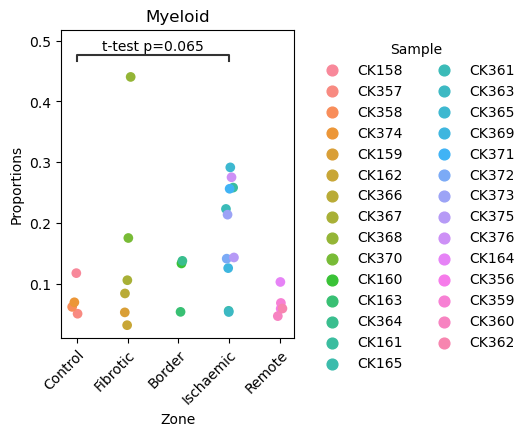

In [16]:
res_snrna.plot(clusters=["Myeloid"], save=f"{FIG_PATH}/humanMI_rep_myeloid.pdf")

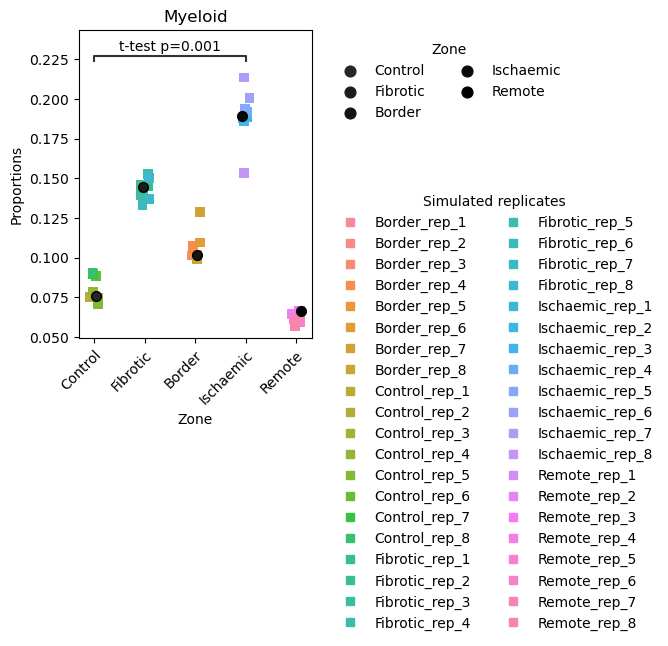

In [17]:
res_snrna_boot.plot(clusters=["Myeloid"], save=f"{FIG_PATH}/humanMI_norep_myeloid.pdf")